## Markov Chains

A Markov chain is a stochastic model describing a sequence of possible events in which the probability of each event depends only on the state attained in the previous event.

## Def
A Markov process is a stochastic process that satisfies the Markov property (sometimes characterized as "memorylessness"). In simpler terms, it is a process for which predictions can be made regarding future outcomes based solely on its present state and—most importantly—such predictions are just as good as the ones that could be made knowing the process's full history. In other words, conditional on the present state of the system, its future and past states are independent.

![image](https://miro.medium.com/max/4702/1*Iz10wdtzJQ7IUaWEwdhHAw@2x.png)

## Stationary distribution 

A stationary distribution π is a (row) vector, whose entries are non-negative and sum to 1, is unchanged by the operation of transition matrix P on it and so is defined by

${\displaystyle \pi \mathbf {P} =\pi .}$

$\pi$ is left eigenvector

If the Markov chain is irreducible and aperiodic, then there is a unique stationary distribution π

## Reversible Markov Chains

A Markov process is called a reversible Markov process or reversible Markov chain if it satisfies the detailed balance equations. These equations require that the transition probability matrix, P, for the Markov process possess a stationary distribution (i.e. equilibrium probability distribution) π such that

${\displaystyle \pi _{i}P_{ij}=\pi _{j}P_{ji}\,,}$, 
where Pij is the Markov transition probability from state i to state j, i.e. $P_{ji} = P(X_{t} = j | X_{t − 1 = i}$), and $\pi_{i}$ and $\pi_{j}$are the equilibrium probabilities of being in states i and j, respectively.

The detailed balance condition is stronger than that required merely for a stationary distribution; that is, there are Markov processes with stationary distributions that do not have detailed balance

## Example

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/2/2b/Markovkate_01.svg/440px-Markovkate_01.svg.png)

[Reference](https://en.wikipedia.org/wiki/Markov_chain)

In [ ]:
import numpy as np
trans_prob= [[0.3,0.7], [0.4,0.6]]

init = [0.1,0.9]

np.matmul(np.transpose(init), trans_prob)


array([0.39, 0.61])

In [ ]:
x=trans_prob
for i in range(10):
   x= np.matmul(trans_prob,x)

np.matmul(np.transpose(init), x)

array([0.36363636, 0.63636364])

## Left Eigenvector

A stationary distribution π is a (row) vector, whose entries are non-negative and sum to 1, is unchanged by the operation of transition matrix P on it and so is defined by

${\displaystyle \pi \mathbf {P} =\pi .}$

## MCMC

Markov chain Monte Carlo (MCMC) methods comprise a class of algorithms for sampling from a probability distribution. By constructing a Markov chain that has the desired distribution as its equilibrium distribution, one can obtain a sample of the desired distribution by recording states from the chain. The more steps are included, the more closely the distribution of the sample matches the actual desired distribution.

Markov chain Monte Carlo methods create samples from a continuous random variable, with probability density proportional to a known function. These samples can be used to evaluate an integral over that variable, as its expected value or variance.

## Reducing Correlation

While MCMC methods were created to address multi-dimensional problems better than generic Monte Carlo algorithms, when the number of dimensions rises they too tend to suffer the curse of dimensionality: regions of higher probability tend to stretch and get lost in an increasing volume of space that contributes little to the integral. One way to address this problem could be shortening the steps of the walker, so that it doesn't continuously try to exit the highest probability region, though this way the process would be highly autocorrelated and expensive (i.e. many steps would be required for an accurate result). More sophisticated methods such as Hamiltonian Monte Carlo and the Wang and Landau algorithm use various ways of reducing this autocorrelation, while managing to keep the process in the regions that give a higher contribution to the integral. These algorithms usually rely on a more complicated theory and are harder to implement, but they usually converge faster.



## Gibbs Sampling

Gibbs sampling is applicable when the joint distribution is not known explicitly or is difficult to sample from directly, but the conditional distribution of each variable is known and is easy (or at least, easier) to sample from. The Gibbs sampling algorithm generates an instance from the distribution of each variable in turn, conditional on the current values of the other variables. It can be shown that the sequence of samples constitutes a Markov chain, and the stationary distribution of that Markov chain is just the sought-after joint distribution

[Reference](https://en.wikipedia.org/wiki/Gibbs_sampling)

![image](https://miro.medium.com/max/2332/1*B97nba5CdlRHW6jamAzvMg.png)

## IID Samples

First we simulate Monte Carlo,i.e., independent and identical (IID) samples

Covariance matrix  [[4, 0], [0,4]]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


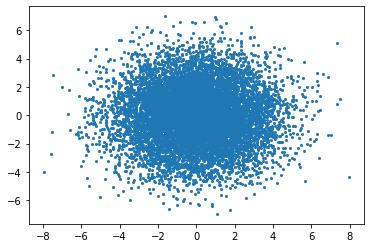

In [ ]:
iid_samples = np.random.multivariate_normal([0,0], [[4, 0], [0,4]], 10000)
plt.scatter(iid_samples[:,0], iid_samples[:,1], s=4)

-0.015593585970206214


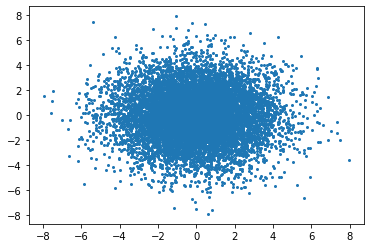

In [ ]:
from scipy.stats import pearsonr
plt.scatter(iid_samples[:-1,0], iid_samples[1:,0], s=4)
print(pearsonr(iid_samples[:-1,0], iid_samples[1:,0])[0])


## Curse of Dimensionality

What is the length of the segment [0,1]
What is the volume of a cube? of a sphere?

The mass of the points close to the boundary.

Probability P(a<=X<=b) of a continuous variable X depends on the density f(x) and the length/area/volume of X

The standard normal distribution has its mode at X=0 (highest density). But the volume of X around zero is smaller as the dimension increases

-0.0020820590565959886


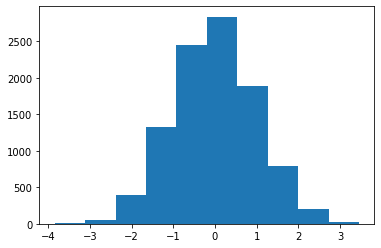

In [2]:
import matplotlib.pyplot as plt
import numpy as np
z = np.random.normal(size=10000)
print(np.mean(z))
plt.hist(z)
plt.show()

1.252487086121698


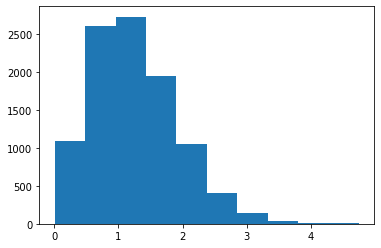

In [4]:
mean = [0, 0]
cov = [[1, 0], [0, 1]]

z = np.random.multivariate_normal(mean, cov, 10000)
p=np.sqrt(np.sum(z**2, axis=1))

print(np.mean(p))

plt.hist(p)

plt.show()

1.585354656128484


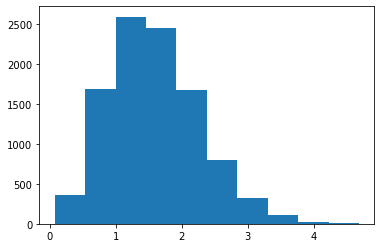

In [5]:
mean = [0, 0,0]
cov = [[1, 0,0], [0, 1,0],[0,0,1]]

z = np.random.multivariate_normal(mean, cov, 10000)
p=np.sqrt(np.sum(z**2, axis=1))
print(np.mean(p))
plt.hist(p)
#plt.axis('equal')
plt.show()


## Gibbs Sampling

(0.49771239095119046, 0.0)


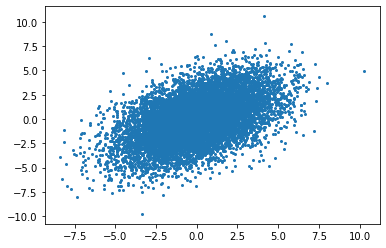

In [ ]:
gibbs_samples = {'x': [0], 'y': [0]}

n = 10000

for _ in range(n):
    curr_y = gibbs_samples['y'][-1]
    new_x = np.random.normal(curr_y/2, 2)
    new_y = np.random.normal(new_x/2, 2)
    gibbs_samples['x'].append(new_x)
    gibbs_samples['y'].append(new_y)

print(pearsonr(gibbs_samples['x'], gibbs_samples['y']))
plt.scatter(gibbs_samples['x'], gibbs_samples['y'], s=4)


Rvw: Autocorrelation 
    time series uses autocorrelation

0.2540266288634203


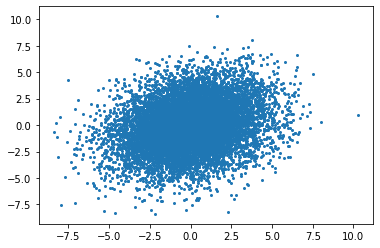

In [ ]:
plt.scatter(gibbs_samples['x'][:-1], gibbs_samples['x'][1:], s=4)
print(pearsonr(gibbs_samples['x'][:-1], gibbs_samples['x'][1:])[0])

## Metropolis-Hastings Algorithm

Gibbs sampling is a special case of the Metropolis–Hastings algorithm

The Metropolis–Hastings algorithm can draw samples from any probability distribution ${\displaystyle P(x)}$, provided that we know a function ${\displaystyle f(x)}$ proportional to the density of ${\displaystyle P}$ and the values of ${\displaystyle f(x)}$ can be calculated. The requirement that ${\displaystyle f(x)}$ must only be proportional to the density, rather than exactly equal to it, makes the Metropolis–Hastings algorithm particularly useful, because calculating the necessary normalization factor is often extremely difficult in practice.

### Existence of stationary distribution: 
there must exist a stationary distribution ${\displaystyle \pi (x)}$. A sufficient but not necessary condition is detailed balance: ${\displaystyle \pi (x)P(x'\mid x)=\pi (x')P(x\mid x')}$.

### Uniqueness of stationary distribution: 
the stationary distribution ${\displaystyle \pi (x)}$ must be unique. This is guaranteed by ergodicity of the Markov process, which requires that every state must (1) be aperiodic—the system does not return to the same state at fixed intervals; and (2) be positive recurrent—the expected number of steps for returning to the same state is finite.

The Metropolis–Hastings algorithm consists in the following:

1. Initialise
Pick an initial state ${\displaystyle x_{0}}$.
Set ${\displaystyle t=0}$.
2. Iterate
   1. Generate a random candidate state ${\displaystyle x'}$ according to ${\displaystyle g(x'\mid x_{t})}$.
   2. Calculate the acceptance probability ${\displaystyle A(x',x_{t})=\min \left(1,{\frac {P(x')}{P(x_{t})}}{\frac {g(x_{t}\mid x')}{g(x'\mid x_{t})}}\right)}$.
   3. Accept or reject:
      1. generate a uniform random number ${\displaystyle u\in [0,1]};$
      2. if ${\displaystyle u\leq A(x',x_{t})}$, then accept the new state and set ${\displaystyle x_{t+1}=x'}$;
      3. if ${\displaystyle u>A(x',x_{t})}$, then reject the new state, and copy the old state forward ${\displaystyle x_{t+1}=x_{t}}$.
  4. Increment: set ${\displaystyle t=t+1}$.

(array([  16.,  143.,  560., 1591., 2659., 2436., 1700.,  674.,  184.,
          38.]),
 array([-3.53863032, -2.83690026, -2.13517019, -1.43344013, -0.73171006,
        -0.02998   ,  0.67175007,  1.37348013,  2.07521019,  2.77694026,
         3.47867032]),
 <a list of 10 Patch objects>)

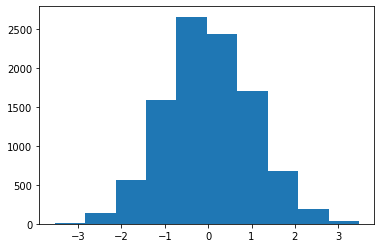

In [ ]:
def p_tilde(x):
    return np.exp(-x**2/2)

metropolis_samples = [0]

n= 10000
for _ in range(n):
    proposal = np.random.normal(metropolis_samples[-1], 2)
    
    acceptance_prob = min(1, p_tilde(proposal) / p_tilde(metropolis_samples[-1]))
    
    # uniform random
    if np.random.random() < acceptance_prob:
        metropolis_samples.append(proposal)
    else:
        metropolis_samples.append(metropolis_samples[-1])

plt.hist(metropolis_samples)

## Explore PyMC3

[Reference](https://docs.pymc.io/)




A simple Bayesian linear regression model with normal priors for the parameters

We are interested in predicting outcomes 𝑌 as normally-distributed observations with an expected value 𝜇 that is a linear function of two predictor variables, 𝑋1 and 𝑋2.

$𝑌∼N(𝜇,𝜎^2)$

$𝜇=𝛼+𝛽_1𝑋_1+𝛽_2𝑋_2$

$𝛼∼N(0,100)$

$𝛽_i∼N(0,100)$

$𝜎∼|N(0,1)|$
 
[Reference](https://docs.pymc.io/pymc-examples/examples/getting_started.html)

In [ ]:
import pymc3 as pm
import numpy as np

#X, y = linear_training_data()
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + np.random.randn(size) * sigma

basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [ ]:
map_estimate = pm.find_MAP(model=basic_model)
map_estimate

{'alpha': array(0.96292153),
 'beta': array([0.93433907, 2.06671322]),
 'sigma': array(0.89760391),
 'sigma_log__': array(-0.10802639)}

In [ ]:
with basic_model:
    # draw 500 posterior samples
    trace = pm.sample(500, return_inferencedata=False)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma, beta, alpha]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 3 seconds.


In [ ]:
trace["alpha"][-5:]

array([0.80903348, 0.80903348, 1.10304872, 0.88173833, 1.03085423])

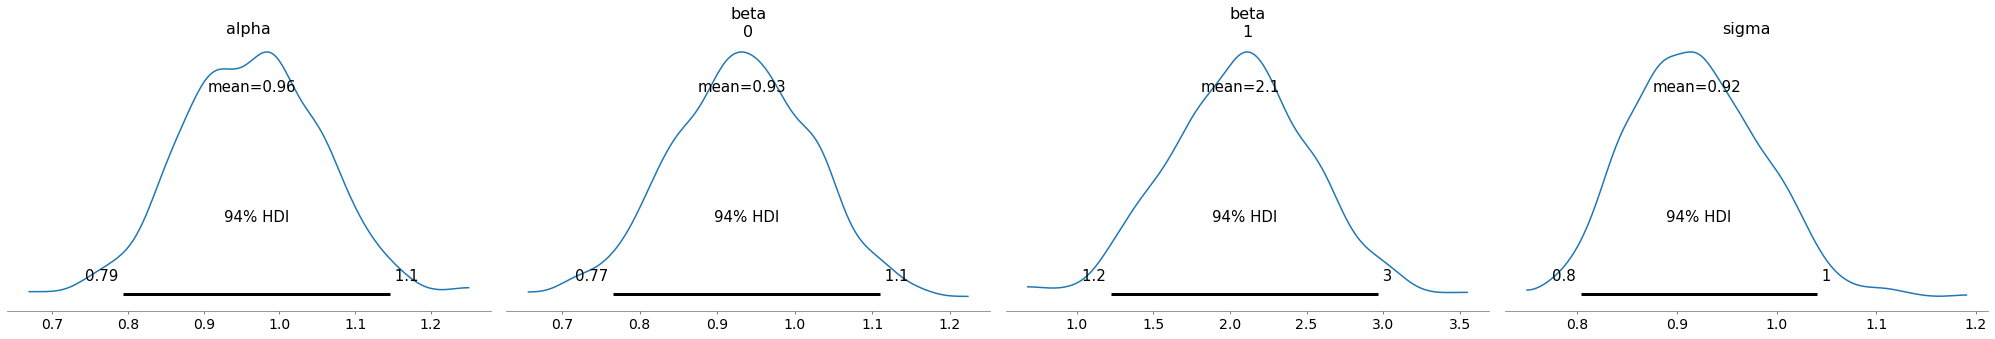

In [ ]:
import arviz as az
with basic_model:
    az.plot_posterior(trace);

In [ ]:
with basic_model:
    display(az.summary(trace, round_to=2))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.96,0.09,0.79,1.15,0.00,0.00,1709.54,800.27,1.01
beta[0],0.93,0.09,0.77,1.11,0.00,0.00,1296.49,739.80,1.00
beta[1],2.07,0.47,1.22,2.97,0.01,0.01,1794.29,666.80,1.00
sigma,0.92,0.07,0.80,1.04,0.00,0.00,1505.99,705.62,1.00


## Chi Feng's interactive demo

[MCMC Interactive Gallery](https://github.com/chi-feng/mcmc-demo/blob/master/README.md)

## Hamiltonian Monte Carlo

Hamiltonian Monte Carlo corresponds to an instance of the Metropolis–Hastings algorithm, with a Hamiltonian dynamics evolution simulated using a time-reversible and volume-preserving numerical integrator (typically the leapfrog integrator) to propose a move to a new point in the state space.

### Algorithm
Suppose the target distribution to sample is ${\displaystyle f(\mathbf {x} )}$ and a chain of samples ${\displaystyle \mathbf {X} _{0},\mathbf {X} _{1},\mathbf {X} _{2},\ldots }$ is required. The Hamilton's equations are

${\displaystyle {\frac {{\text{d}}x_{i}}{{\text{d}}t}}={\frac {\partial H}{\partial p_{i}}}}$
and

${\displaystyle {\dfrac {{\text{d}}p_{i}}{{\text{d}}t}}=-{\dfrac {\partial H}{\partial x_{i}}}}$
where ${\displaystyle x_{i}}$ and ${\displaystyle p_{i}}$ are the ${\displaystyle i}$ ith component of the position and momentum vector respectively and ${\displaystyle H}$ is the Hamiltonian

A paper on HMC:
[Michael Betancourt: A Conceptual Introduction to
Hamiltonian Monte Carlo](https://arxiv.org/pdf/1701.02434.pdf) 

Physical Analogy:

![imgae](http://elevanth.org/blog/wp-content/uploads/2017/11/tumblr_n84kkuafX11tfhyyio1_500.gif)



## Exercise

A coin was tossed 200 times. It landed head up 120 times. Use PyMC3 to get the posterior distribution of p, i.e., the probability of heads.

Assume the prior is a beta distribution with parameters 𝛼=1=𝛽.

Use pm.Beta and pm.Binomial

Plot the posterior with ArviZ 


In [ ]:
for coin 

## Exercise

Simulate a random walk on the integer line, starting at X=0, and at each step moves +1 if a fair coin lands heads up and -1 otherwise.

In [30]:
import numpy as np
import seaborn as sns

# tot = 0
totArr = []

for i in range(1000):
    x=0
    tot = 0
    while abs(x) < 10:
        # coin = np.random.choice([1,0],size=1,p=[0.5, 0.5])
        coin = np.random.binomial(n=1, size=1, p=0.5)
        if coin == 1:
            x += 1
            tot += 1
        else:
            x -= 1
            tot += 1
    # print(tot)
    totArr.append(tot)
print(totArr[0:10])
print(np.mean(totArr), np.max(totArr), np.min(totArr))

[38, 42, 168, 12, 396, 184, 124, 116, 48, 34]
98.074 474 10


In [13]:
coin

array([0])